In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df=pd.read_csv("/content/claimants.csv")

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
df.drop(["CASENUM"],inplace=True,axis=1)

In [ ]:
df.shape

(1340, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [ ]:
df=df.dropna()
df.shape

(1096, 7)

In [ ]:
df.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [ ]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [ ]:
X

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1334,1.0,1.0,0.0,16.0,0.060
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [ ]:
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
y_pred=classifier.predict(X)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_pred_df=pd.DataFrame({"Y":Y,"yhat":classifier.predict(X)})

In [ ]:
y_pred_df

,Y,yhat
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [ ]:
((381+395)/(381+197+123+395))*100

70.8029197080292

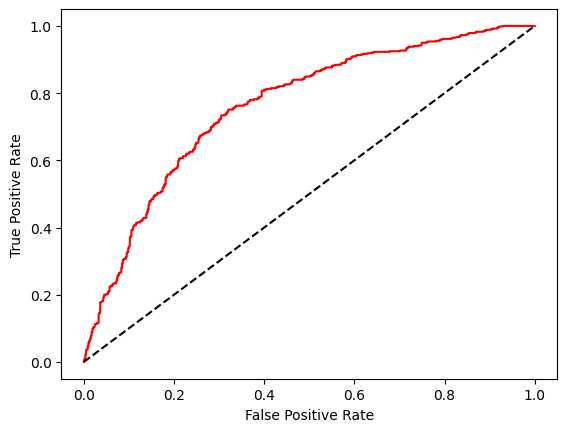

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1],"k--")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
auc

np.float64(0.7108589063606365)